# Lab 3A: Implementation of Simple Linear Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
dataset = pd.read_csv("C:\\Users\\hplap\\Labs\\ML_Lab\\Salary.csv")

In [3]:
dataset.shape

(30, 2)

In [4]:
dataset.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Preprocessing Steps

### Step 1: Divide dataframe into Independent variable/input and dependent/output features

In [7]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

In [8]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [9]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


### Step 4: Splitting Data into Training and Testing

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.2,
                                                 random_state=0)

In [11]:
print(X_train.shape)
print(X_test.shape)

(24, 1)
(6, 1)


## Create Simple Linear Regression Model using Sci-kit Learn Library

In [12]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [13]:
print("Intercept B0 = ",regressor.intercept_)
print("Coefficient B1 = ",regressor.coef_)

Intercept B0 =  26780.09915062818
Coefficient B1 =  [9312.57512673]


**Hence the Equation for our model is
y = 26780.1 + 9312.56 * x**

when x = 0 then y = 26780.1 
means if  fresher came the salary = 26,780.1

In [31]:
# Using above equation find salary offer for experince of 6.1 years

ynew = 26780.1 + 9312.56 * 6.1
print("Salary offer for experience of 6.1 Years = ",ynew)

Salary offer for experience of 6.1 Years =  83586.71599999999


In [15]:
# To perform Validation

ypred = regressor.predict(X_test)

In [16]:
print(ypred)
print(Y_test)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]
[ 37731. 122391.  57081.  63218. 116969. 109431.]


In [17]:
# Accuracy 

print("Testing Accuracy = ",regressor.score(X_test, Y_test))
print("Training Accuracy = ",regressor.score(X_train, Y_train))

Testing Accuracy =  0.988169515729126
Training Accuracy =  0.9411949620562126


In [18]:
# Predict the salary for 7 years

print("Salary for 7 years = ", regressor.predict([[7]]))

Salary for 7 years =  [91968.12503773]


## Evaluate the Model

In [21]:
from sklearn.metrics import r2_score

r2_score(Y_test,ypred)

0.988169515729126

## Visualizing the Training Model

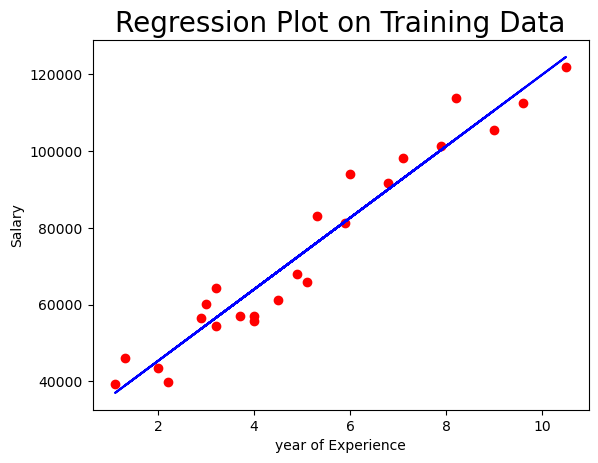

In [19]:
plt.scatter(X_train,Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Regression Plot on Training Data', size=20)
plt.xlabel("year of Experience")
plt.ylabel("Salary")
plt.show()

## Visualizing the Training Model

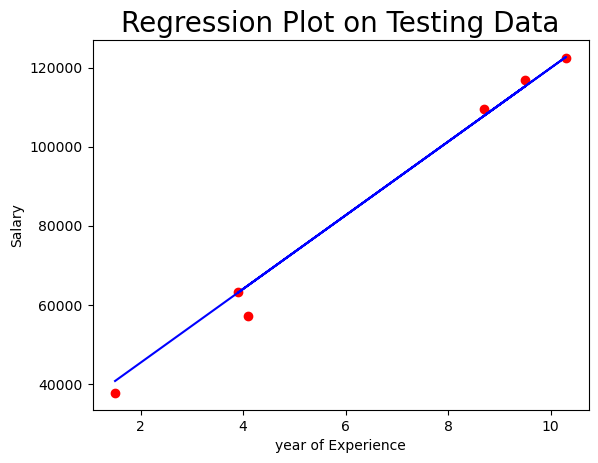

In [20]:
plt.scatter(X_test,Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.title('Regression Plot on Testing Data', size=20)
plt.xlabel("year of Experience")
plt.ylabel("Salary")
plt.show()

# New Model by changing Random_State

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                 Y,
                                                 test_size = 0.2, 
                                                 random_state=3)

In [23]:
print(X_train.shape)
print(X_test.shape)

(24, 1)
(6, 1)


In [24]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [25]:
print("Intercept B0 = ",regressor.intercept_)
print("Coefficient B1 = ",regressor.coef_)

Intercept B0 =  26197.767027384238
Coefficient B1 =  [9418.56697369]


**Hence the Equation for our model is
y = 26197.8 + 9418.57 * x**

when x = 0 then y = 26197.8 
means if  fresher came the salary = 26,197.80

In [33]:
# Using above equation find salary offer for experince of 6.1 years

ynew = 26197.8 + 9418.57 * 6.1
print("Salary offer for experience of 6.1 Years = ",ynew)

Salary offer for experience of 6.1 Years =  83651.07699999999


In [27]:
# To perform Validation

ypred = regressor.predict(X_test)

In [28]:
print(ypred)
print(Y_test)

[ 72348.74519846  53511.61125108 100604.44611953 115674.15327744
  81767.31217215  68581.31840899]
[ 67938.  56642. 101302. 116969.  81363.  61111.]


In [29]:
# Accuracy 

print("Testing Accuracy = ",regressor.score(X_test, Y_test))
print("Training Accuracy = ",regressor.score(X_train, Y_train))

Testing Accuracy =  0.9695039421049821
Training Accuracy =  0.9545249190394051


In [30]:
# Predict the salary for 7 years

print("Salary for 7 years = ", regressor.predict([[7]]))

Salary for 7 years =  [92127.73584321]


## Evaluate New Model

In [32]:
from sklearn.metrics import r2_score

r2_score(Y_test,ypred)

0.9695039421049821